In [3]:
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import time
import matplotlib.pyplot as plt
from MLP import MLP

In [4]:
def one_hot_encoding(input_matrix):
    numclass=np.max(input_matrix,axis=0)
    matrix=np.zeros((len(input_matrix),int(np.sum(numclass))))
    for idx_row,row in enumerate(input_matrix):
        for idx_column,value in enumerate(row):
            matrix[idx_row,int(np.sum(numclass[:idx_column]))+int(value)-1]=1
    return matrix

# Monk 1

In [5]:
data_monk=np.loadtxt("../../data/MONK/monks-1.train",usecols=range(0,7))
labels=np.reshape(data_monk[:,0],(len(data_monk),1))
input_data=data_monk[:,1:]
input_data=one_hot_encoding(input_data)



data_monk_val=np.loadtxt("../../data/MONK/monks-1.test",usecols=range(0,7))
val_labels=np.reshape(data_monk_val[:,0],(len(data_monk_val),1))
val_data=data_monk_val[:,1:]
val_data=one_hot_encoding(val_data)

In [9]:
structure=[4,np.shape(labels)[1]]
act_func=[("sigmoid",1),("sigmoid",1)]
start=[0.4,0.4]

netw = MLP(structure, func=act_func,
           starting_points=start)

In [10]:
learning_rate=0.5
lamb=0
N_epoch=1200
alpha=0.9
nesterov=False
batch_size=10
netw.train(input_data, labels, val_data, val_labels,
        epoch = N_epoch,eta = learning_rate, lamb = lamb,alpha=alpha,
        nesterov=nesterov,batch_size=batch_size)

Epoch 1200:  [train MEE = 0.0213]  [val MEE = 0.0242]                              
Elapsed time: 5.278541088104248 s


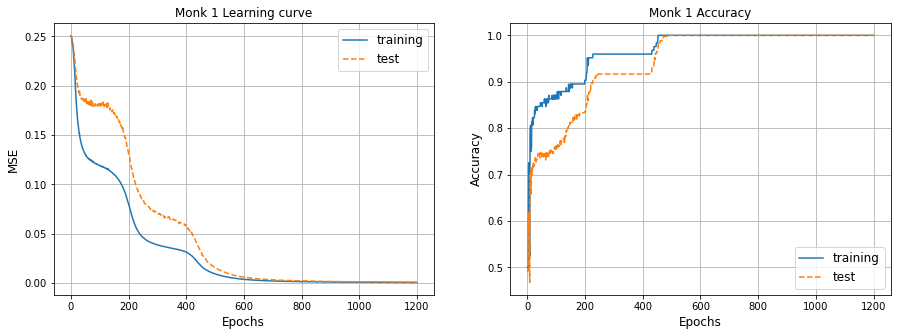

In [11]:
train_pred = netw.predict(input_data)
val_pred = netw.predict(val_data)
x = np.arange(len(netw.train_MEE))

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x,netw.train_MSE,label="training")
plt.plot(x,netw.val_MSE,"--",label="test")
plt.title("Monk 1 Learning curve")
plt.xlabel("Epochs",fontsize="large")
plt.ylabel("MSE",fontsize="large")
plt.grid()
plt.legend(fontsize="large")

plt.subplot(122)
plt.plot(x,netw.train_accuracy,label="training")
plt.plot(x,netw.val_accuracy,"--",label="test")
plt.title ("Monk 1 Accuracy")
plt.ylabel("Accuracy",fontsize="large")
plt.xlabel("Epochs",fontsize="large")
plt.legend(fontsize="large")
plt.grid()